# Análisis Descriptivo e Inferencial de Datos

Canton a analizar: Milagro -> 0910

Provincia: Guayas

## Analisis general de los datos

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#conda activate p2-statistics

![dic](dic.png)


In [167]:
# TIENE LOS DATOS COMPLETOS 2018-2019
micro_1 = pd.read_csv('SBAC19_micro_514852_20200325_CSV.csv', sep=';')
micro_1.drop('codigo', axis=1, inplace=True)

variables = ['financiamiento', 'tp_sexo', 'tp_area', 'isec', 'inev', 'pes', 'imat',
       'ilyl', 'icn', 'ies', 'nl_imat', 'nl_ilyl', 'nl_icn', 'nl_ies',
       'nl_inev']

for variable in variables:
    print(f"Unique values of {variable}:")
    print(micro_1[variable].unique())
    print()


C:\Users\HOME\AppData\Local\Temp\ipykernel_3172\1802268172.py:2: DtypeWarning: Columns (2,22,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  micro_1 = pd.read_csv('SBAC19_micro_514852_20200325_CSV.csv', sep=';')


Unique values of financiamiento:
[     1      2      3 999999]

Unique values of tp_sexo:
[1 2]

Unique values of tp_area:
[ 1  2 98]

Unique values of isec:
[',86847' '-1,14563' ',21734' ... '-,17423' '-,196352309' '-,651073539']

Unique values of inev:
['7,55' '7,5' '5,93' '8,04' '7,86' '8,36' '8,56' '8,44' '8,47' '8,76'
 '8,65' '7,8' '8,82' '9,02' '8,94' '8,18' '8,24' '8,79' '9,17' '9,22'
 '9,08' '8,85' '7,63' '8,88' '8,7' '8,91' '8,99' '9,28' '8,13' '7,75'
 '8,01' '7,53' '7,31' '7,58' '6,79' '7,64' '7,43' '8,07' '7,89' '7,05'
 '7,7' '8,21' '7,92' '9,11' '8,27' '7,81' '7,29' '8,09' '6,41' '7,32'
 '6,73' '7,2' '7,21' '7,78' '7,49' '7,36' '7,35' '6,74' '6,61' '7,52'
 '6,89' '7,48' '7,72' '6,95' '7,15' '7,46' '6,72' '7' '7,44' '6,57' '8,67'
 '8,15' '7,13' '7,69' '7,24' '8,38' '7,18' '6,99' '7,1' '6,71' '7,65'
 '7,66' '6,91' '6,53' '7,03' '6,97' '7,02' '6,98' '7,38' '6,75' '5,59'
 '7,04' '6,9' '6,55' '6,94' '7,27' '999999' '7,84' '7,98' '7,4' '7,28'
 '7,41' '6,36' '6,25' '8,53' '5,27' '

In [168]:
# NO TIENE LOS DATOS COMPLETOS 2019-2020
micro_2 = pd.read_csv('SBAC20_micro_272370_20210121_CSV.csv', sep=';')
micro_2.drop('codigo', axis=1, inplace=True)

variables = ['financiamiento', 'tp_sexo', 'tp_area', 'isec', 'inev', 'pes', 'imat',
       'ilyl', 'icn', 'ies', 'nl_imat', 'nl_ilyl', 'nl_icn', 'nl_ies',
       'nl_inev']

for variable in variables:
    print(f"Unique values of {variable}:")
    print(micro_2[variable].unique())
    print()

C:\Users\HOME\AppData\Local\Temp\ipykernel_3172\2435848767.py:2: DtypeWarning: Columns (2,22,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  micro_2 = pd.read_csv('SBAC20_micro_272370_20210121_CSV.csv', sep=';')


Unique values of financiamiento:
[     1      3      2 999999]

Unique values of tp_sexo:
[1 2]

Unique values of tp_area:
[ 2  1 98]

Unique values of isec:
['-,29756' '1,98499' '-1,12751' ... ',73235' '-1,34887' ',2267']

Unique values of inev:
['7,3' '7,22' '7,38' '7,27' '6,69' '7,66' '7,21' '6,92' '7,25' '7,75' '7'
 '6,83' '7,12' '8,32' '6,87' '6,72' '7,19' '6,75' '6,68' '7,06' '7,14'
 '7,15' '7,33' '7,45' '7,36' '7,46' '6,58' '7,02' '7,17' '7,54' '8,74'
 '6,8' '7,05' '999999' '6,33' '7,63' '6,16' '7,64' '7,41' '6,77' '8,85'
 '6,36' '6,88' '6,55' '7,31' '6,85' '7,28' '7,09' '7,08' '6,73' '6,76'
 '7,4' '7,04' '7,59' '7,18' '7,78' '6,53' '7,44' '6,98' '7,74' '6,62'
 '6,56' '7,24' '6,66' '6,37' '6,5' '7,56' '7,77' '6,74' '6,46' '7,61'
 '7,29' '7,93' '6,95' '6,93' '6,78' '7,34' '6,81' '6,99' '7,62' '7,39'
 '7,55' '6,64' '8,08' '7,96' '6,44' '7,49' '7,23' '6,1' '7,47' '7,73'
 '7,26' '7,48' '7,7' '6,57' '6,86' '6,49' '6,71' '7,2' '7,07' '8,05'
 '7,01' '6,94' '7,16' '6,31' '6,08' '6,63' '

In [169]:
micro= micro_1

# Milagro -> 910
# Guayaquil -> 901
micro_milagro = micro[micro["id_cant"] == 910]

columns_to_drop = ['ciclo', 'amie', 'nm_regi', 'es_regeva', 'id_zona', 'id_dist', 'id_circ', 'id_prov', 'id_cant', 'id_parr']
micro_milagro.drop(columns_to_drop, axis=1, inplace=True)

to_drop = ["tp_sost", "na_eano", "etnibbe", 'discapacidad', 'quintil', 'poblacion', 'estado', "deshonestidad", "isec"]
micro_milagro.drop(to_drop, axis=1, inplace=True)
micro_milagro

C:\Users\HOME\AppData\Local\Temp\ipykernel_3172\942426489.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micro_milagro.drop(columns_to_drop, axis=1, inplace=True)
C:\Users\HOME\AppData\Local\Temp\ipykernel_3172\942426489.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micro_milagro.drop(to_drop, axis=1, inplace=True)


,financiamiento,tp_sexo,tp_area,inev,pes,imat,ilyl,icn,ies,nl_inev,nl_imat,nl_ilyl,nl_icn,nl_ies
117397,2,2,1,"7,31",628,"7,12","7,69",7,"7,46",1,1,1,1,1
117398,2,1,1,"8,7",796,"8,96","8,85","8,85","8,15",2,2,2,2,2
117399,2,1,1,"8,44",733,"8,15","9,31","8,38","7,92",2,2,2,2,1
117400,2,2,1,"8,79",799,"9,08","9,08","8,62","8,38",2,2,2,2,2
117401,2,1,1,"8,76",796,"8,85","9,19","8,62","8,38",2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514643,999999,2,2,999999,574,999999,999999,999999,999999,999999,999999,999999,999999,999999
514644,999999,1,2,999999,583,999999,999999,999999,999999,999999,999999,999999,999999,999999
514688,999999,1,2,999999,748,999999,999999,999999,999999,999999,999999,999999,999999,999999
514699,999999,2,2,999999,999999,999999,999999,999999,999999,999999,999999,999999,999999,999999


In [171]:
micro_milagro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6948 entries, 117397 to 514814
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   financiamiento  6948 non-null   int64 
 1   tp_sexo         6948 non-null   int64 
 2   tp_area         6948 non-null   int64 
 3   inev            6948 non-null   object
 4   pes             6948 non-null   int64 
 5   imat            6948 non-null   object
 6   ilyl            6948 non-null   object
 7   icn             6948 non-null   object
 8   ies             6948 non-null   object
 9   nl_inev         6948 non-null   int64 
 10  nl_imat         6948 non-null   int64 
 11  nl_ilyl         6948 non-null   int64 
 12  nl_icn          6948 non-null   int64 
 13  nl_ies          6948 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 814.2+ KB


# Conversiones de tipos de datos

In [172]:
variables = ['financiamiento', 'tp_sexo', 'tp_area', 'inev', 'pes', 'imat',
       'ilyl', 'icn', 'ies', 'nl_imat', 'nl_ilyl', 'nl_icn', 'nl_ies',
       'nl_inev']

micro_milagro['financiamiento'] = micro_milagro['financiamiento'].replace({
    1: 'Publico', 
    2: 'Privado', 
    3: 'Mixto', 
    999999:np.nan
    })

micro_milagro['tp_sexo'] = micro_milagro['tp_sexo'].replace({
    1: 'Mujer', 
    2: 'Hombre', 
    999999:np.nan
    })

micro_milagro['tp_area'] = micro_milagro['tp_area'].replace({
    1: 'Rural', 
    2: 'Urbana', 
    98: 'Exterior',
    999999:np.nan
    })

micro_milagro['inev'] = micro_milagro['inev'].replace(',', '.', regex=True)
micro_milagro['inev'] = micro_milagro['inev'].replace('999999', np.nan, regex=True).astype('double')
micro_milagro['inev'] = micro_milagro['inev'].replace({999999:np.nan})

micro_milagro['pes'] = micro_milagro['pes'].replace({999999:np.nan})

micro_milagro['imat'] = micro_milagro['imat'].replace(',', '.', regex=True)
micro_milagro['imat'] = micro_milagro['imat'].replace('999999', np.nan, regex=True).astype('double')
micro_milagro['imat'] = micro_milagro['imat'].replace({999999:np.nan})

micro_milagro['ilyl'] = micro_milagro['ilyl'].replace(',', '.', regex=True)
micro_milagro['ilyl'] = micro_milagro['ilyl'].replace('999999', np.nan, regex=True).astype('double')
micro_milagro['ilyl'] = micro_milagro['ilyl'].replace({999999:np.nan})

micro_milagro['icn'] = micro_milagro['icn'].replace(',', '.', regex=True)
micro_milagro['icn'] = micro_milagro['icn'].replace('999999', np.nan, regex=True).astype('double')
micro_milagro['icn'] = micro_milagro['icn'].replace({999999:np.nan})

micro_milagro['ies'] = micro_milagro['ies'].replace(',', '.', regex=True)
micro_milagro['ies'] = micro_milagro['ies'].replace('999999', np.nan, regex=True).astype('double')
micro_milagro['ies'] = micro_milagro['ies'].replace({999999:np.nan})

categorias = {
    0: 'Insuficiente', 
    1: 'Elemental', 
    2: 'Satisfactorio',
    3: 'Excelente',
    999999:np.nan
    }

micro_milagro['nl_inev'] = micro_milagro['nl_inev'].replace(categorias)
micro_milagro['nl_imat'] = micro_milagro['nl_imat'].replace(categorias)
micro_milagro['nl_ilyl'] = micro_milagro['nl_ilyl'].replace(categorias)
micro_milagro['nl_icn'] = micro_milagro['nl_icn'].replace(categorias)
micro_milagro['nl_ies'] = micro_milagro['nl_ies'].replace(categorias)

for variable in variables:
    print(f"Unique values of {variable}:")
    print(micro_milagro[variable].unique())
    print()

C:\Users\HOME\AppData\Local\Temp\ipykernel_3172\1391263104.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micro_milagro['financiamiento'] = micro_milagro['financiamiento'].replace({


Unique values of financiamiento:
['Privado' 'Publico' nan]

Unique values of tp_sexo:
['Hombre' 'Mujer']

Unique values of tp_area:
['Rural' 'Urbana']

Unique values of inev:
[7.31 8.7  8.44 8.79 8.76 7.83 7.43 7.66 8.15 7.69 7.89 7.54 7.86 8.21
 8.18 7.92 6.66 8.56 7.49 7.95 8.72 9.33 6.71 6.79 7.29 7.63 6.35 6.06
 6.25 6.67 6.88 6.57 6.68 6.93 7.07 6.95 7.14 6.24 8.   6.87 7.03 7.09
 7.61 7.2  7.18 6.84 6.52 6.69 6.49 6.38 7.12 7.38 6.56 8.03 6.41 5.71
 6.89 7.72 7.4  7.01 7.   7.78 9.22 7.74 7.98 9.08 7.75 6.46 8.27 8.29
 7.26 8.12 8.73 7.76 7.46 7.51 8.52 8.01 8.32 6.9  8.59 7.8  9.13 8.23
 6.03 6.5  6.63 7.21 7.3  6.92 7.24 6.65 6.34 6.64 6.7  6.14 6.12 7.34
 6.59 6.3  7.52 6.19 6.62 6.54 7.23 6.29 7.02 6.09 6.04 6.6  6.98 7.28
 7.1  7.56 6.96 9.07 8.09 7.15 7.55 7.58 9.28 6.99 6.97 6.78 6.73 6.81
 6.51 7.57 7.17 6.36 7.41 5.66 8.84 7.27 6.76 7.87 6.74 8.35 8.81 7.16
 9.16 9.25 6.44 8.38 7.05 6.8  6.47 6.94 6.58 7.22 8.06 5.82 5.77 6.37
 6.55 6.2  6.1  8.26 5.88 6.77 7.39 6.   7.3

C:\Users\HOME\AppData\Local\Temp\ipykernel_3172\1391263104.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micro_milagro['tp_sexo'] = micro_milagro['tp_sexo'].replace({
C:\Users\HOME\AppData\Local\Temp\ipykernel_3172\1391263104.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micro_milagro['tp_area'] = micro_milagro['tp_area'].replace({
C:\Users\HOME\AppData\Local\Temp\ipykernel_3172\1391263104.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [175]:
micro_milagro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6948 entries, 117397 to 514814
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   financiamiento  3918 non-null   object 
 1   tp_sexo         6948 non-null   object 
 2   tp_area         6948 non-null   object 
 3   inev            3906 non-null   float64
 4   pes             6550 non-null   float64
 5   imat            3906 non-null   float64
 6   ilyl            3906 non-null   float64
 7   icn             3906 non-null   float64
 8   ies             3906 non-null   float64
 9   nl_inev         3906 non-null   object 
 10  nl_imat         3906 non-null   object 
 11  nl_ilyl         3906 non-null   object 
 12  nl_icn          3906 non-null   object 
 13  nl_ies          3906 non-null   object 
dtypes: float64(6), object(8)
memory usage: 814.2+ KB


In [176]:
micro_milagro.describe()

,inev,pes,imat,ilyl,icn,ies
count,3906.000000,6550.000000,3906.000000,3906.000000,3906.000000,3906.000000
mean,7.434270,649.947939,7.551930,7.604700,7.316206,7.278684
std,0.822105,83.258486,0.894639,0.932126,0.998795,1.055694
min,4.910000,0.000000,4.430000,4.640000,4.000000,4.000000
25%,6.850000,592.000000,7.000000,7.000000,6.570000,6.570000
50%,7.320000,634.000000,7.460000,7.580000,7.230000,7.230000
75%,7.920000,688.000000,8.150000,8.270000,7.920000,7.920000
max,9.910000,973.000000,10.000000,10.000000,10.000000,10.000000


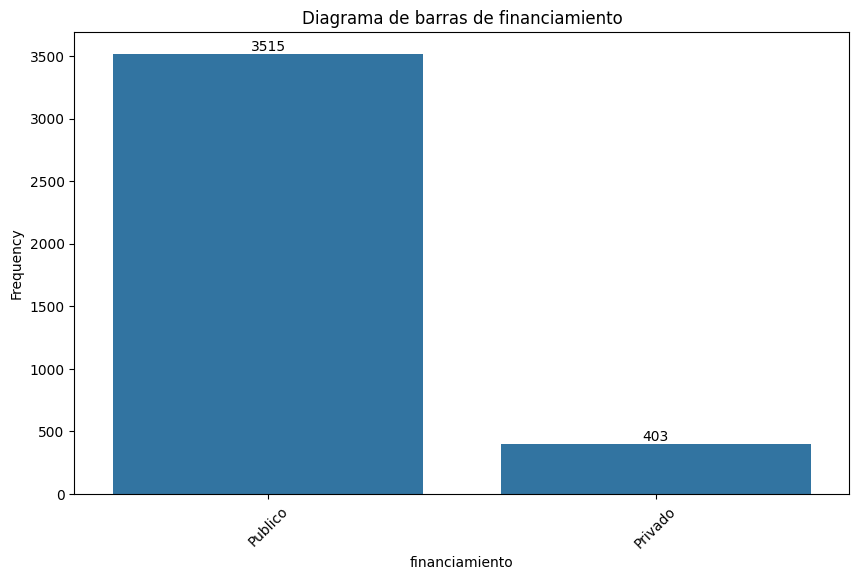

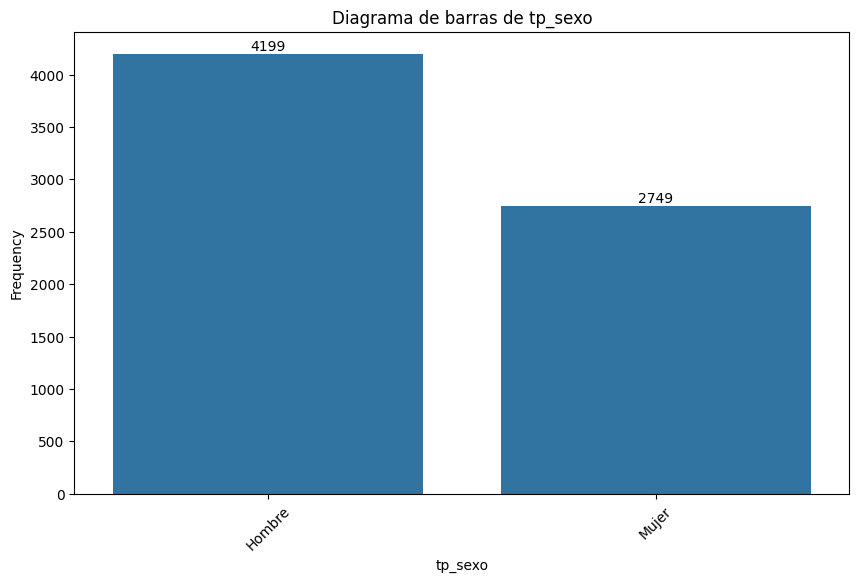

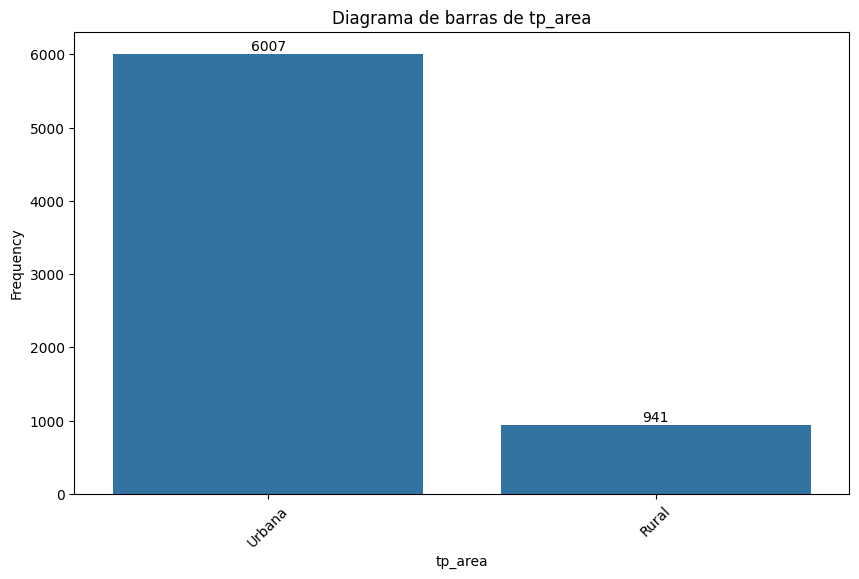

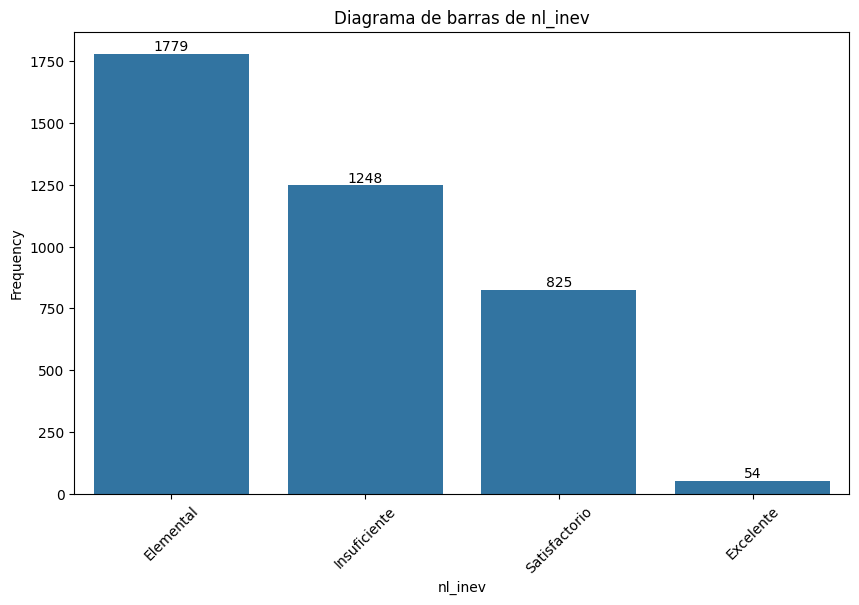

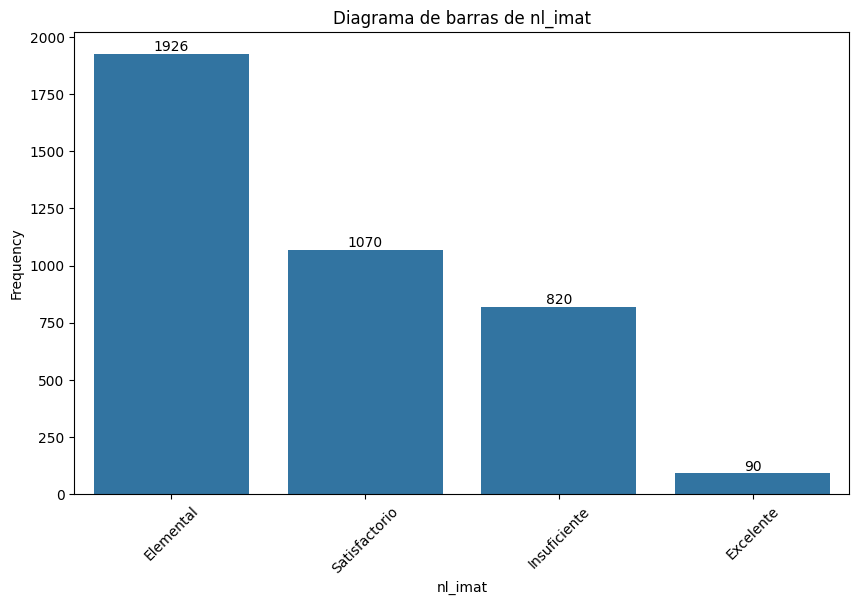

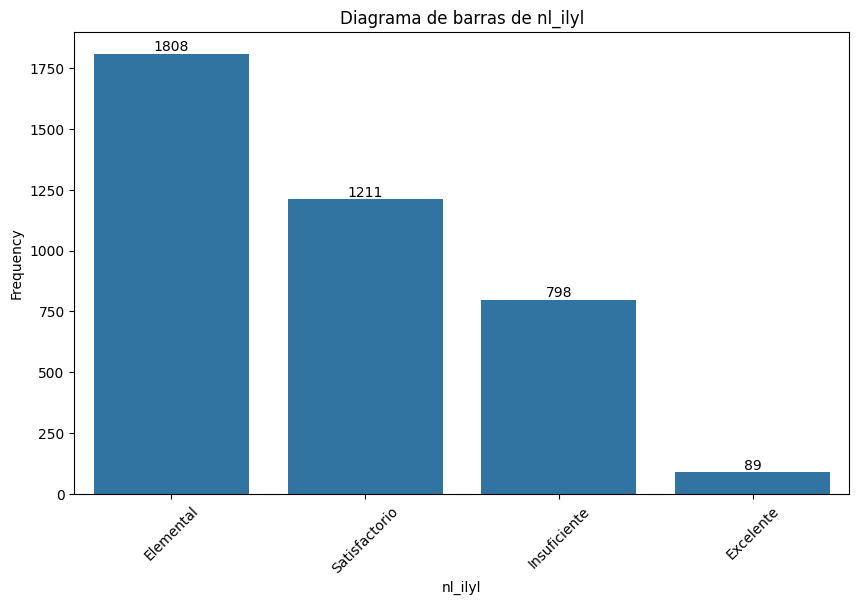

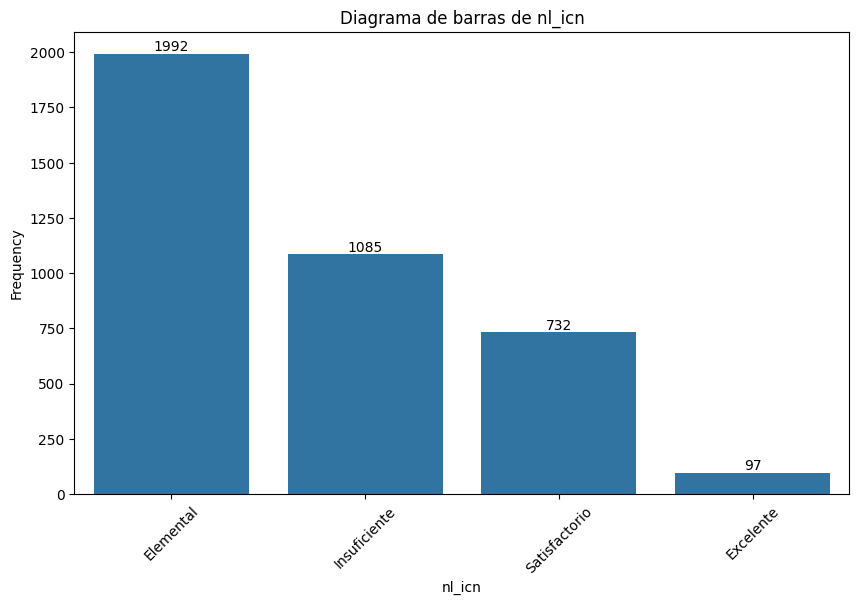

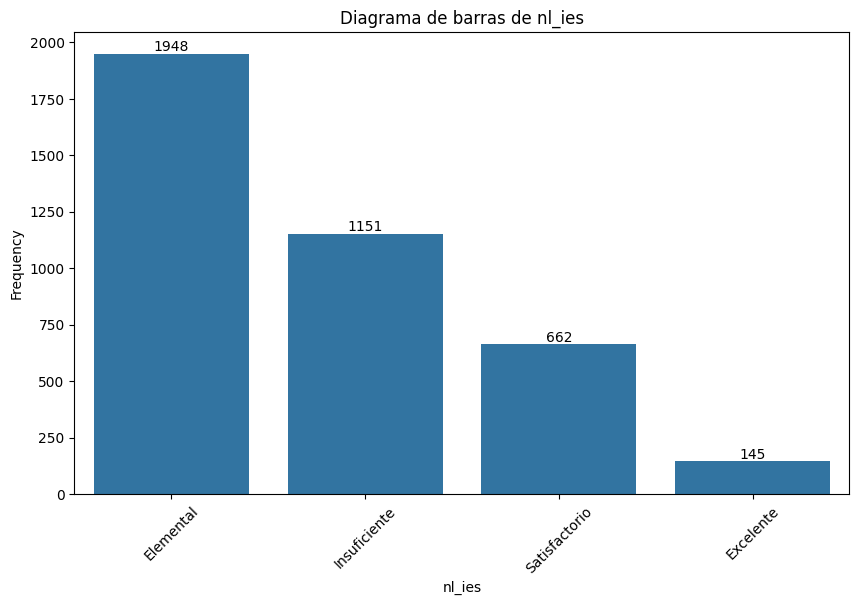

In [179]:
# Obtener las columnas de tipo object
object_columns = micro_milagro.select_dtypes(include='object').columns

for column in object_columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=micro_milagro[column].value_counts().index, y=micro_milagro[column].value_counts().values)
    plt.title(f'Diagrama de barras de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    for i, v in enumerate(micro_milagro[column].value_counts().values):
        plt.text(i, v, str(v), ha='center', va='bottom')
    plt.show()


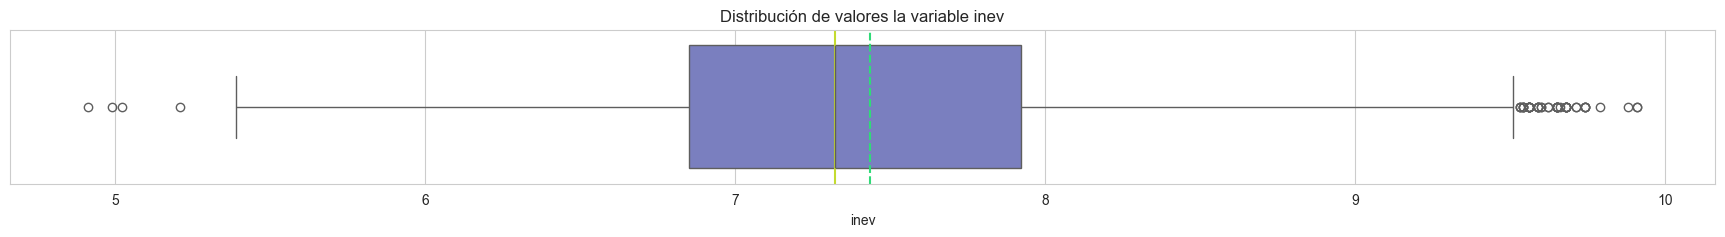

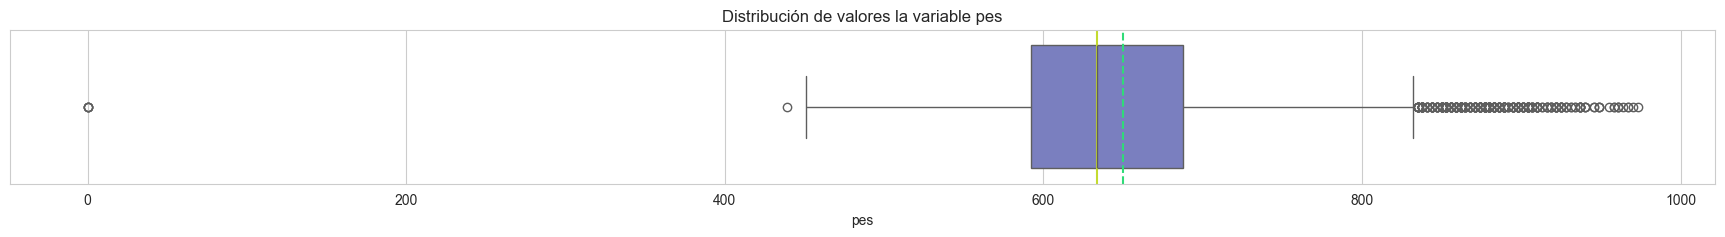

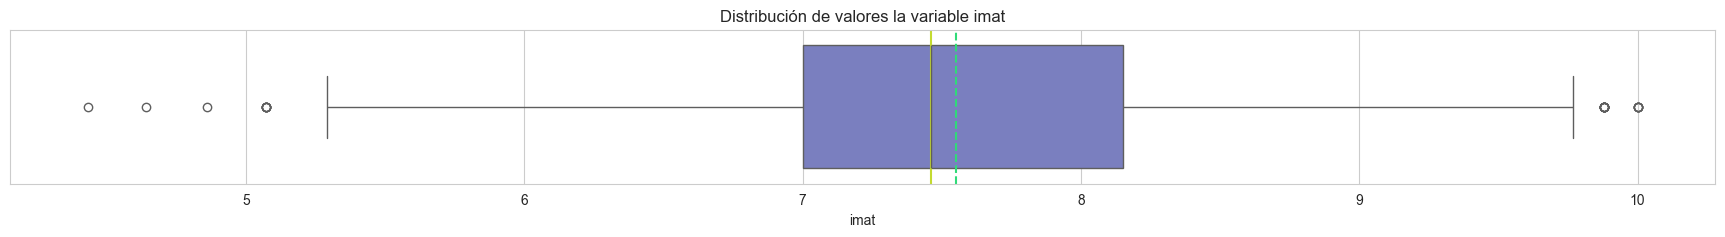

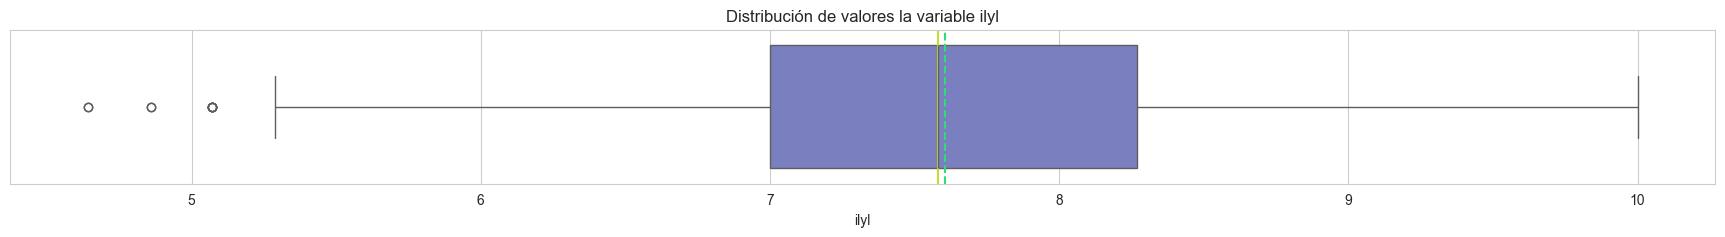

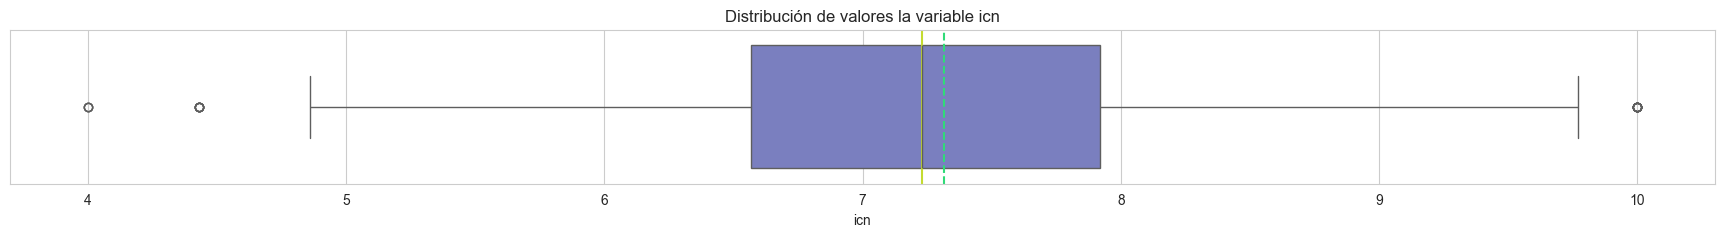

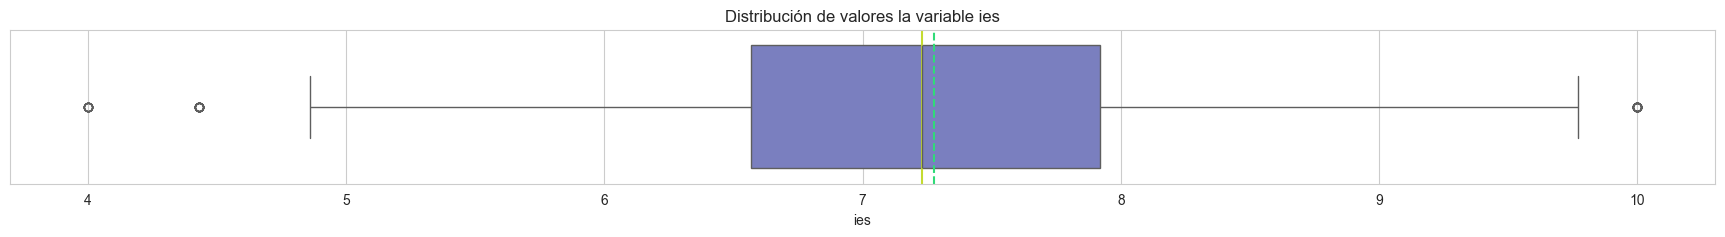

In [200]:
def boxplot(value):
    data = micro_milagro.columns
    column_data = micro_milagro[data[value]]
    if column_data.dtype in [np.int64, np.float64]:
        sns.set_style('whitegrid')
        fig, ax = plt.subplots(1, 1, figsize=(22, 2))
        sns.boxplot(x=column_data, color='#6E75CA', ax=ax)
        
        # Calculate and draw the mean
        mean = column_data.mean()
        ax.axvline(mean, color='#30db78', linestyle='--')
        #ax.text(mean, 0.75, 'Mean: {:.2f}'.format(mean), va='center', ha='center', backgroundcolor='w')
        
        # Calculate and draw the median
        median = column_data.median()
        ax.axvline(median, color='#c4db30', linestyle='-')
        #ax.text(median, 0.85, 'Median: {:.2f}'.format(median), va='center', ha='center', backgroundcolor='w')
        
        plt.title('Distribución de valores la variable '+data[value])
        plt.xlabel(data[value])     
        plt.show()
        fig.tight_layout()
         

dataTypes=micro_milagro.dtypes
for i in range(dataTypes.size):
    boxplot(i)